In [2]:
from ola_models import * 
from ola_RNN import * 

import os, time, copy, math, re, json, pickle, random
import numpy as np
import pandas as pd

import torch, torchvision
import torchvision.models as models
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.init as init
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker

from functools import partial 

cuda_available = torch.cuda.is_available()
device = torch.device("cuda:0" if cuda_available else "cpu")
print(f'''using device {device}''')

path = !pwd
path = path[0]
print(path)

using device cuda:0
/home/r2/Documents/RNNexp


In [3]:
bs  = 30
sql = 30 
lr  = 0.0005 

sched = combine_scheds([0.15, 0.25, 0.2, 0.4], [sched_cos(0.0005, 0.0008), sched_cos(0.0008, 0.0005),sched_lin(0.0005,0.0005),sched_cos(0.0005,0.00005)]) 
data          = pp_trumpdata(path+"/data/trump/", [0.9,0.95], bs)
data.train_dl = TweetDataLoader(data,data.train.tweets,bs,sql,shuffle=True)
data.valid_dl = TweetDataLoader(data,data.valid.tweets,bs,sql,shuffle=False)

model  = cuda(GRU(len(data.decoder), 150))
opt    = optim.RMSprop(model.parameters(), lr)
learn  = Learner(model, nn.NLLLoss(), opt , data, lr=lr)

In [4]:
cbs    = CallbackHandler([CounterCallback(10000),StatsCallback()])

In [8]:
fit_rnn(1,learn,cbs)

getting validation
finished: 0.005%
getting validation
finished: 0.009999999999999995%
getting validation
finished: 0.014999999999999965%
getting validation
finished: 0.019999999999999934%
getting validation
finished: 0.024999999999999904%
getting validation
finished: 0.029999999999999874%
getting validation
finished: 0.034999999999999976%
getting validation
finished: 0.04000000000000012%
getting validation
finished: 0.04500000000000026%
getting validation
finished: 0.050000000000000405%
getting validation
finished: 0.05500000000000055%
getting validation
finished: 0.06000000000000069%
getting validation
finished: 0.06500000000000083%
getting validation
finished: 0.07000000000000098%
getting validation
finished: 0.07500000000000112%
getting validation
finished: 0.08000000000000126%
getting validation
finished: 0.08500000000000141%
getting validation
finished: 0.09000000000000155%
getting validation
finished: 0.0950000000000017%
getting validation
finished: 0.10000000000000184%
getting 

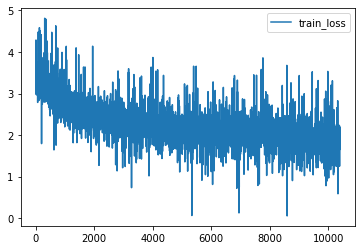

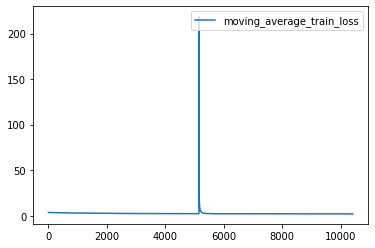

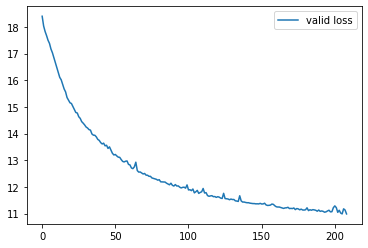

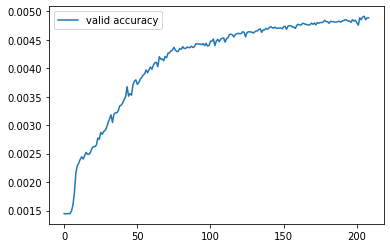

In [11]:
plot_list(learn.stats.train_loss[100::], 'train_loss')
plot_list(learn.stats.train_mva_loss[100::], 'moving_average_train_loss')
plot_list(learn.stats.valid_loss, 'valid loss')
plot_list(learn.stats.valid_accu, 'valid accuracy')

In [10]:
generate_seq(learn.model,learn.data,300)

^.coully bese -7nat of s. our on meding tian thar for be the Wempaitert!€0 Itriabsell be felleg we buing!€ Veto htpp://t.co/P1nJ1Epue9h€shO  outh!€
!€.€?€/tiday!€€ UT NeTOphows wint cor’t repudedid.....€€bon veruch a meor for and and it why heve for Didman Fakey! The killong le mese to Iadingal well 
